
# üß™ Ejercicio pr√°ctico: Muestreo y Cuantizaci√≥n

Este notebook resuelve paso a paso los ejercicios propuestos en la materia **T√©cnicas de Procesamiento de Im√°genes**, bas√°ndose en el an√°lisis de muestreo y cuantizaci√≥n sobre im√°genes digitales.


## Ejercicios pr√°cticos

Exploraci√≥n b√°sica: Cambiar entre las im√°genes disponibles (mandril.png y scale.png) modificando la variable nombre_imagen y observar las diferencias en los resultados.

Efectos del muestreo: Experimentar con diferentes valores del factor_muestreo (2, 4, 8, etc.) y analizar:

* ¬øC√≥mo afecta a la calidad visual de la imagen?
* ¬øCu√°nto se reduce el tama√±o de la imagen con cada factor?
* ¬øA partir de qu√© factor se hace notoria la p√©rdida de calidad?


Efectos de la cuantizaci√≥n: Probar con diferentes valores del factor_cuantizacion (32, 64, 128) y observar:

* ¬øC√≥mo cambia la apariencia de la imagen?
* ¬øQu√© sucede con el histograma en cada caso?
* ¬øEn qu√© tipos de im√°genes es m√°s o menos notorio el efecto?

Reto de comprensi√≥n:

* ¬øQu√© ocurre si combinamos muestreo y cuantizaci√≥n en una misma imagen?
* ¬øQu√© proceso afecta m√°s a la calidad percibida de la imagen?
* ¬øQu√© proceso permite mayor compresi√≥n de datos?

In [3]:
!pip install matplotlib opencv-python -q

You should consider upgrading via the 'c:\users\misse\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # si se usa en Colab


## üì• Cargar imagen original

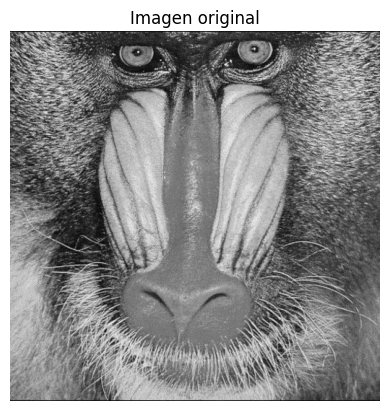

In [5]:

# Cambiar entre 'mandril.png' y 'scale.png'
nombre_imagen = 'mandril.png'  # tambi√©n pod√©s probar con 'scale.png'
imagen = cv2.imread(nombre_imagen, cv2.IMREAD_GRAYSCALE)

# Mostrar imagen original
plt.imshow(imagen, cmap='gray')
plt.title('Imagen original')
plt.axis('off')
plt.show()

# Guardar tama√±o original
alto_original, ancho_original = imagen.shape


## üîª Muestreo: Reducci√≥n de resoluci√≥n

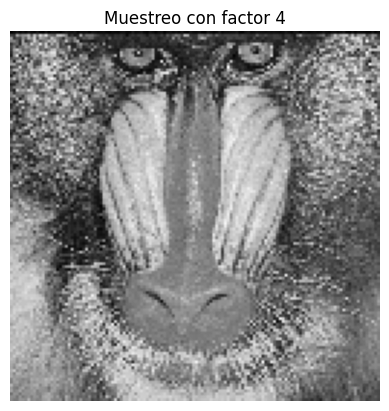

Reducci√≥n de datos: 93.75%


In [6]:

factor_muestreo = 4  # Prob√° con 2, 4, 8

imagen_muestreada = imagen[::factor_muestreo, ::factor_muestreo]

# Mostrar imagen reducida
plt.imshow(imagen_muestreada, cmap='gray')
plt.title(f'Muestreo con factor {factor_muestreo}')
plt.axis('off')
plt.show()

# Calcular porcentaje de reducci√≥n
pixels_original = alto_original * ancho_original
pixels_muestreados = imagen_muestreada.shape[0] * imagen_muestreada.shape[1]
reduccion = 100 * (1 - pixels_muestreados / pixels_original)

print(f'Reducci√≥n de datos: {reduccion:.2f}%')


## üåó Cuantizaci√≥n: Reducci√≥n de niveles de gris

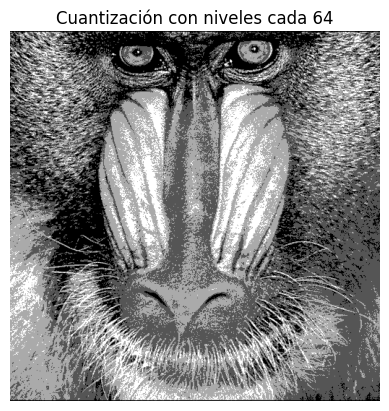

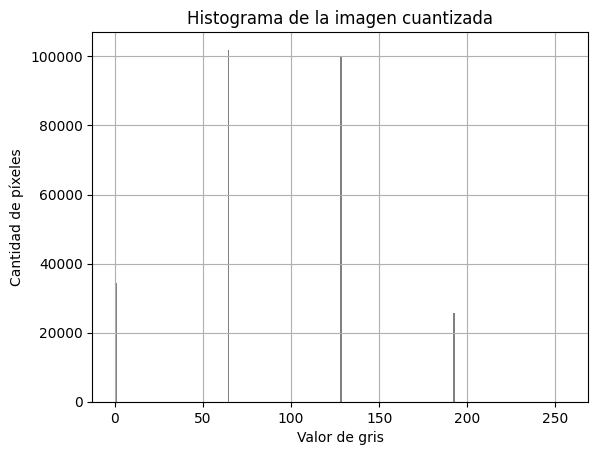

In [7]:

factor_cuantizacion = 64  # Prob√° con 32, 64, 128

imagen_cuantizada = (imagen // factor_cuantizacion) * factor_cuantizacion

# Mostrar imagen cuantizada
plt.imshow(imagen_cuantizada, cmap='gray')
plt.title(f'Cuantizaci√≥n con niveles cada {factor_cuantizacion}')
plt.axis('off')
plt.show()

# Histograma
plt.hist(imagen_cuantizada.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histograma de la imagen cuantizada')
plt.xlabel('Valor de gris')
plt.ylabel('Cantidad de p√≠xeles')
plt.grid(True)
plt.show()


## üß© Combinaci√≥n de muestreo + cuantizaci√≥n

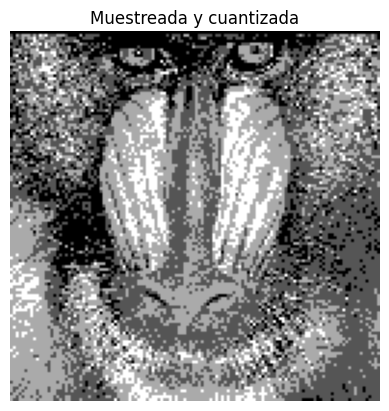

In [8]:

# Aplicar primero muestreo y luego cuantizaci√≥n
imagen_comb = (imagen_muestreada // factor_cuantizacion) * factor_cuantizacion

plt.imshow(imagen_comb, cmap='gray')
plt.title(f'Muestreada y cuantizada')
plt.axis('off')
plt.show()



## ‚úÖ Conclusiones

- El muestreo reduce el tama√±o de la imagen, afectando la nitidez.
- La cuantizaci√≥n reduce la cantidad de tonos posibles, generando p√©rdida de suavidad.
- La combinaci√≥n de ambas operaciones acent√∫a la degradaci√≥n visual.
- La elecci√≥n de los factores depende del balance entre calidad percibida y compresi√≥n deseada.
